<a href="https://colab.research.google.com/github/gustavougarte1/DataScience/blob/main/Desafio_modulo_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import numpy as np
pip install imbalanced-learn
# Carregar o dataset
file_path = '/content/data_banknote_authentication.txt'
columns = ['Variance', 'Skewness', 'Kurtosis', 'Entropy', 'Class']
data = pd.read_csv(file_path, header=None, names=columns)

# Verificar se os dados são numéricos
data[columns[:-1]] = data[columns[:-1]].apply(pd.to_numeric, errors='coerce')

# Verificar se há valores não numéricos
print(data.isnull().sum())

Variance    1
Skewness    1
Kurtosis    1
Entropy     1
Class       0
dtype: int64


In [14]:
# Remover linhas com valores ausentes
data.dropna(inplace=True)

# Verificar novamente se os dados estão corretos
print(data.isnull().sum())

Variance    0
Skewness    0
Kurtosis    0
Entropy     0
Class       0
dtype: int64


In [16]:
from imblearn.under_sampling import RandomUnderSampler, TomekLinks

# Separar features e alvo
X = data.drop('Class', axis=1)
y = data['Class']

# Aplicar RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

# Aplicar TomekLinks
tl = TomekLinks(sampling_strategy='all')
X_resampled, y_resampled = tl.fit_resample(X_resampled, y_resampled)

# Verificar a nova distribuição das classes
print(y_resampled.value_counts())

Class
0    610
1    610
Name: count, dtype: int64


In [17]:
from sklearn.model_selection import train_test_split

# Separar os dados
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Inicializar o modelo
model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=100)

# Treinar o modelo
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Matriz de Confusão
print(confusion_matrix(y_test, y_pred))

# Relatório de Classificação
print(classification_report(y_test, y_pred))

# Acurácia
print(f'Acurácia: {accuracy_score(y_test, y_pred)}')

[[126   2]
 [  0 116]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       128
           1       0.98      1.00      0.99       116

    accuracy                           0.99       244
   macro avg       0.99      0.99      0.99       244
weighted avg       0.99      0.99      0.99       244

Acurácia: 0.9918032786885246


In [20]:
# Matriz de Confusão
print(confusion_matrix(y_test, y_pred))

# Relatório de Classificação
print(classification_report(y_test, y_pred))

# Acurácia
print(f'Acurácia: {accuracy_score(y_test, y_pred)}')

[[126   2]
 [  0 116]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       128
           1       0.98      1.00      0.99       116

    accuracy                           0.99       244
   macro avg       0.99      0.99      0.99       244
weighted avg       0.99      0.99      0.99       244

Acurácia: 0.9918032786885246


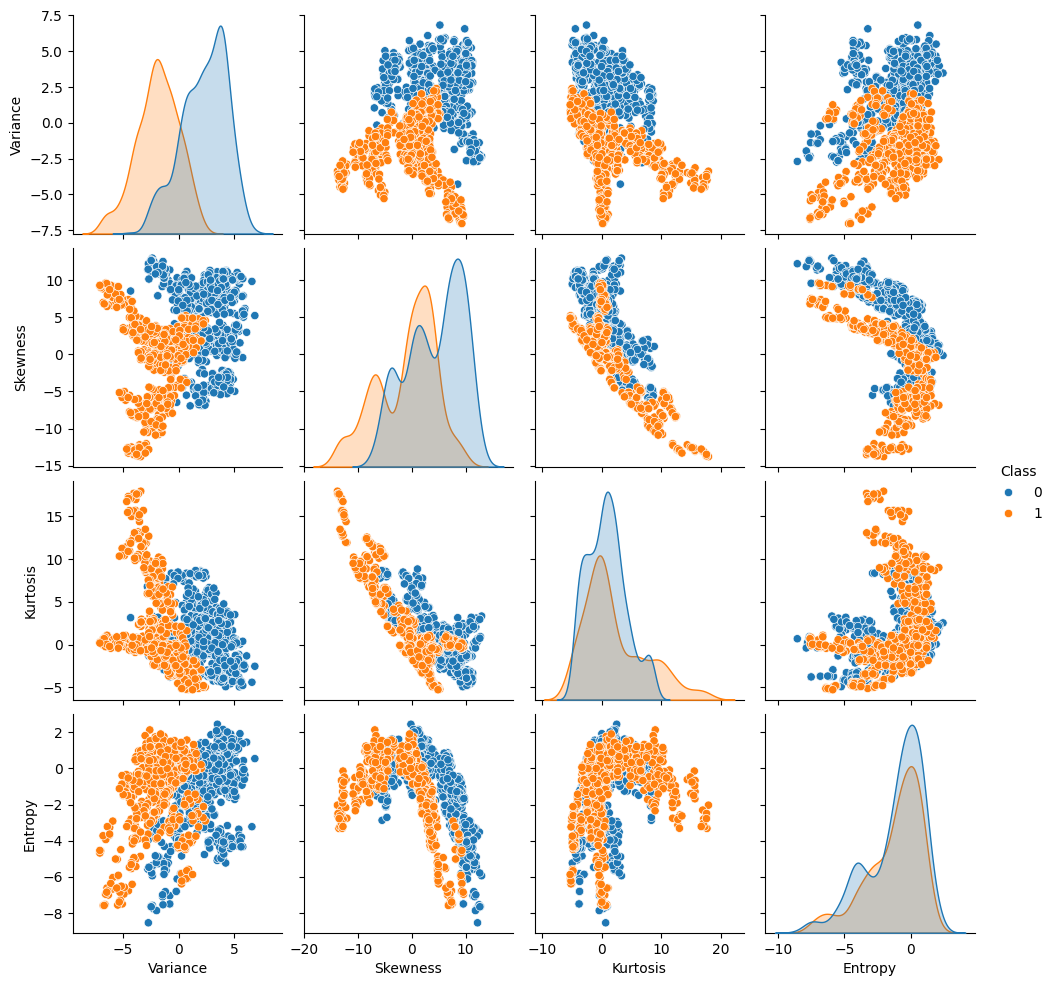

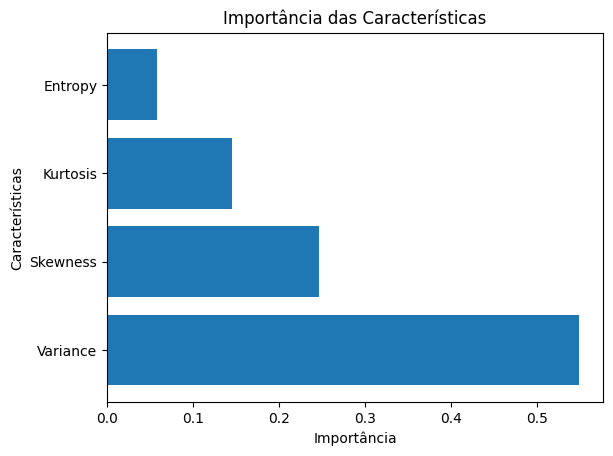

In [22]:
# Vizualização de dados

import seaborn as sns
import matplotlib.pyplot as plt

# Visualizar a distribuição das variáveis
sns.pairplot(data, hue='Class')
plt.show()

# Visualizar a importância das features
importances = model.feature_importances_
feature_names = X.columns
plt.barh(feature_names, importances)
plt.xlabel('Importância')
plt.ylabel('Características')
plt.title('Importância das Características')
plt.show()

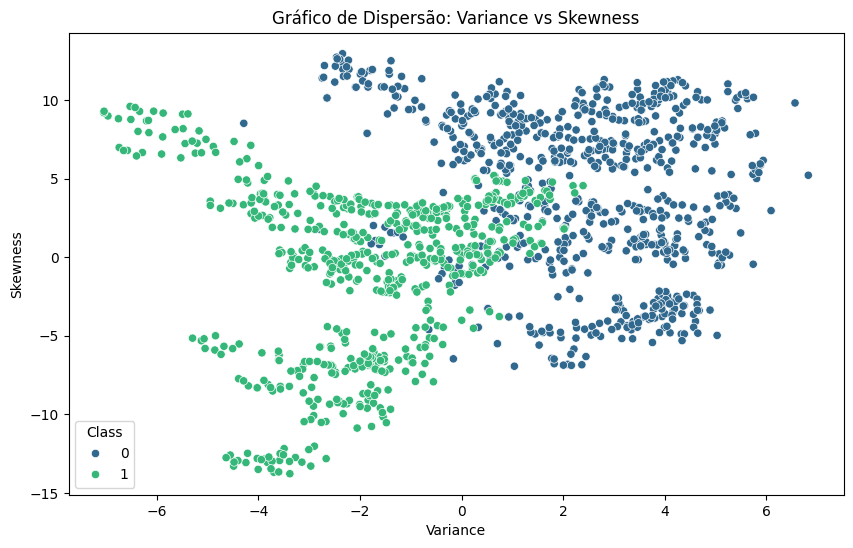

In [23]:
# Gráfico de dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Variance', y='Skewness', hue='Class', palette='viridis')
plt.title('Gráfico de Dispersão: Variance vs Skewness')
plt.xlabel('Variance')
plt.ylabel('Skewness')
plt.legend(title='Class')
plt.show()

In [24]:
# Calcular a correlação
correlation_matrix = data.corr()

# Exibir a matriz de correlação
print(correlation_matrix)

          Variance  Skewness  Kurtosis   Entropy     Class
Variance  1.000000  0.264026 -0.380850  0.276817 -0.724843
Skewness  0.264026  1.000000 -0.786895 -0.526321 -0.444688
Kurtosis -0.380850 -0.786895  1.000000  0.318841  0.155883
Entropy   0.276817 -0.526321  0.318841  1.000000 -0.023424
Class    -0.724843 -0.444688  0.155883 -0.023424  1.000000


In [25]:
# Calcular a média da variável Variance
variance_mean = data['Variance'].mean()
print(variance_mean)

0.4337352570699707


In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Separar features e alvo
X = data.drop('Class', axis=1)
y = data['Class']

# Balanceamento dos dados
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)
tl = TomekLinks(sampling_strategy='all')
X_resampled, y_resampled = tl.fit_resample(X_resampled, y_resampled)

# Separar os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Criar o modelo de Random Forest
model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=100)
model.fit(X_train, y_train)

# Determinar a importância das features
importances = model.feature_importances_
feature_importance = pd.Series(importances, index=X.columns).sort_values(ascending=True)
print(feature_importance)

Entropy     0.057658
Kurtosis    0.145571
Skewness    0.247033
Variance    0.549738
dtype: float64


In [27]:
# Calcular a acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy:.2f}')

Acurácia: 0.99


In [28]:
from sklearn.metrics import confusion_matrix

# Fazer previsões
y_pred = model.predict(X_test)

# Criar a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[126   2]
 [  0 116]]


In [29]:
# Gerar o relatório de classificação
report = classification_report(y_test, y_pred, output_dict=True)

# Precisão para a classe de notas autênticas (classe 0)
precision_authentic = report['0']['precision']
print(f'Precisão para notas autênticas: {precision_authentic:.2f}')

Precisão para notas autênticas: 1.00


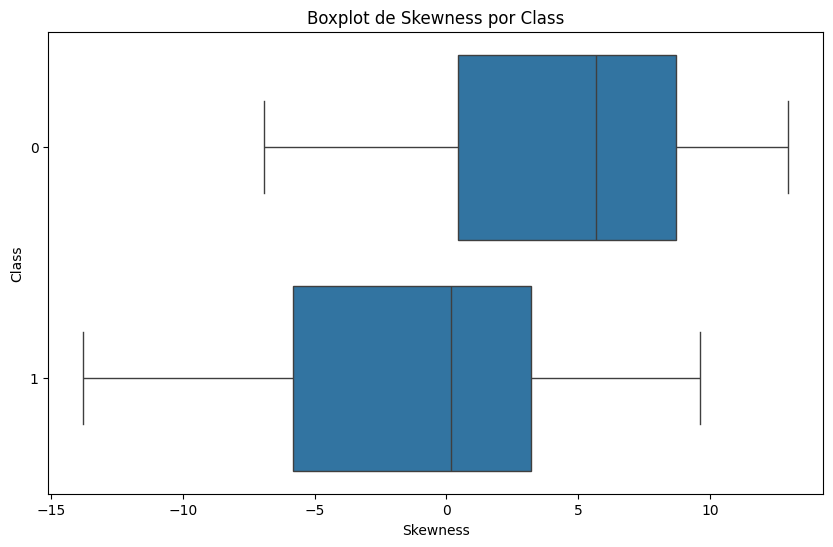

In [31]:
# Gráfico de boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Skewness', y='Class', data=data, orient='h')
plt.title('Boxplot de Skewness por Class')
plt.xlabel('Skewness')
plt.ylabel('Class')
plt.show()